# Исследование влияния covid-19 при летальных исходах на регуляторные молекулы апоптоза и экспрессию hla-dr в моноцитах <br>
Гуков Борис, ФББ 201 <br>
jakewayd.ru@gmail.com<br>
89163936050


Я сам запутался в том, что делал, поэтому решил переписать всё заново.

### Основные статистики

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Для анализа использовались данные, представленные ниже.

In [2]:
a = pd.read_csv('data.csv').iloc[:, [0, 9, 10, 11, 12, 13, 14, 15, 16]].dropna().reset_index(drop = True)
a

,result,CD14_HLA_Dr,AKT,BAD,BCL-2,CASPASE-8,CASPASE-9,JNK,P53
0,0,95.2,138.0,71.5,28.5,58.0,231.5,71.0,92.0
1,0,93.4,183.5,113.0,48.0,67.5,173.0,83.5,69.0
2,1,58.0,404.5,224.0,21.0,69.0,235.0,200.0,87.0
3,0,95.3,408.0,113.0,26.0,45.0,202.0,256.0,65.0
4,0,97.0,59.5,71.5,158.0,125.0,365.5,101.0,91.0
5,0,88.4,203.5,79.0,26.0,56.0,523.5,87.0,54.0
6,1,28.4,786.5,291.5,24.0,92.0,654.0,335.0,68.0
7,0,42.6,199.0,128.0,22.0,50.0,83.5,43.5,59.0
8,0,93.9,160.0,62.0,38.0,56.0,94.0,75.0,85.0
9,0,87.8,259.5,90.0,43.5,48.0,405.0,191.0,139.5


В таблице ниже представлены основные статистики (количества, средние, стандартные отклонения, минимальные и максимальные значинения, а также квантили уровней 25, 50 (медиана) и 75%) в зависимости от исхода: положительный, летальный и в совокупности (выбрать можно в выпадающем меню над таблицей).

In [3]:
def desc(result):
    if type(result) == int:
        return round(a.iloc[:, 1:].loc[a['result'] == result].describe(), 2)
    else:
        return round(a.iloc[:, 1:].describe(), 2)

interact(desc, result = [('Положительный исход', 0), ('Летальный исход', 1), ('В совокупности', 'any')])

interactive(children=(Dropdown(description='result', options=(('Положительный исход', 0), ('Летальный исход', …

<function __main__.desc(result)>

### Критерий Манна-Уитни

Далее к данным был применён непараметрический тест Манна-Уитни, который нужен, чтобы доказать или опровергнуть различия между выборками. Для начала был примен двух сторонний тест, чтобы понять от каких распределений зависит исход.

Тест отверг нулевую гипотезу, то есть показал, что выборки различны, для следующих распределений: CD14_HLA_DR (p-value < 0.01), JNK (p-value < 0.05), BAD (p-value < 0.05) и BCL-2 (p-value < 0.05). Это означает, что эти распределения статистически влияют на исход заболевания. 

$$H_{0}: P(X>Y) = P(Y>X) <=> med(X) = med(Y)$$
$$H_{1}: P(X>Y) \neq P(X<Y) <=> med(X) \neq med(Y)$$

In [4]:
def mann(alternative):
    
    if alternative == 'two-sided':
        print('\n' + 'H1: распределения в зависимости от исхода различны' + '\n')
    elif alternative == 'less':
        print('\n' + 'H1: распределение у умерших меньше, чем распределение у поправившихся' + '\n')
    else:
        print('\n' + 'H1: распределение у умерших больше, чем распределение у поправившихся' + '\n')
    
    def U_crt(i):
        u, p = stats.mannwhitneyu(a.loc[a["result"] == 1][i], a.loc[a["result"] == 0][i], use_continuity = True, alternative = alternative)
        return u, p

    for i in a.columns[1:]:
        print(f'{i}: U-stat = {U_crt(i)[0]:.3f}, p-value = {U_crt(i)[1]:.5f}' )
        if U_crt(i)[1] < 0.05:
            print(f'Критерий отвергает нулевую гипотезу для распределений {i}' + '\n')

interact(mann, alternative = [('Экспрессия изменяется', 'two-sided'), 
                              ('Экспрессия понижается', 'less'), 
                              ('Экспрессия повышается', 'greater')])

interactive(children=(Dropdown(description='alternative', options=(('Экспрессия изменяется', 'two-sided'), ('Э…

<function __main__.mann(alternative)>

### Корреляция по Спирмену:
    
$$ H_{0}: ρ = 0 $$
$$ H_{1}: ρ \neq 0 $$

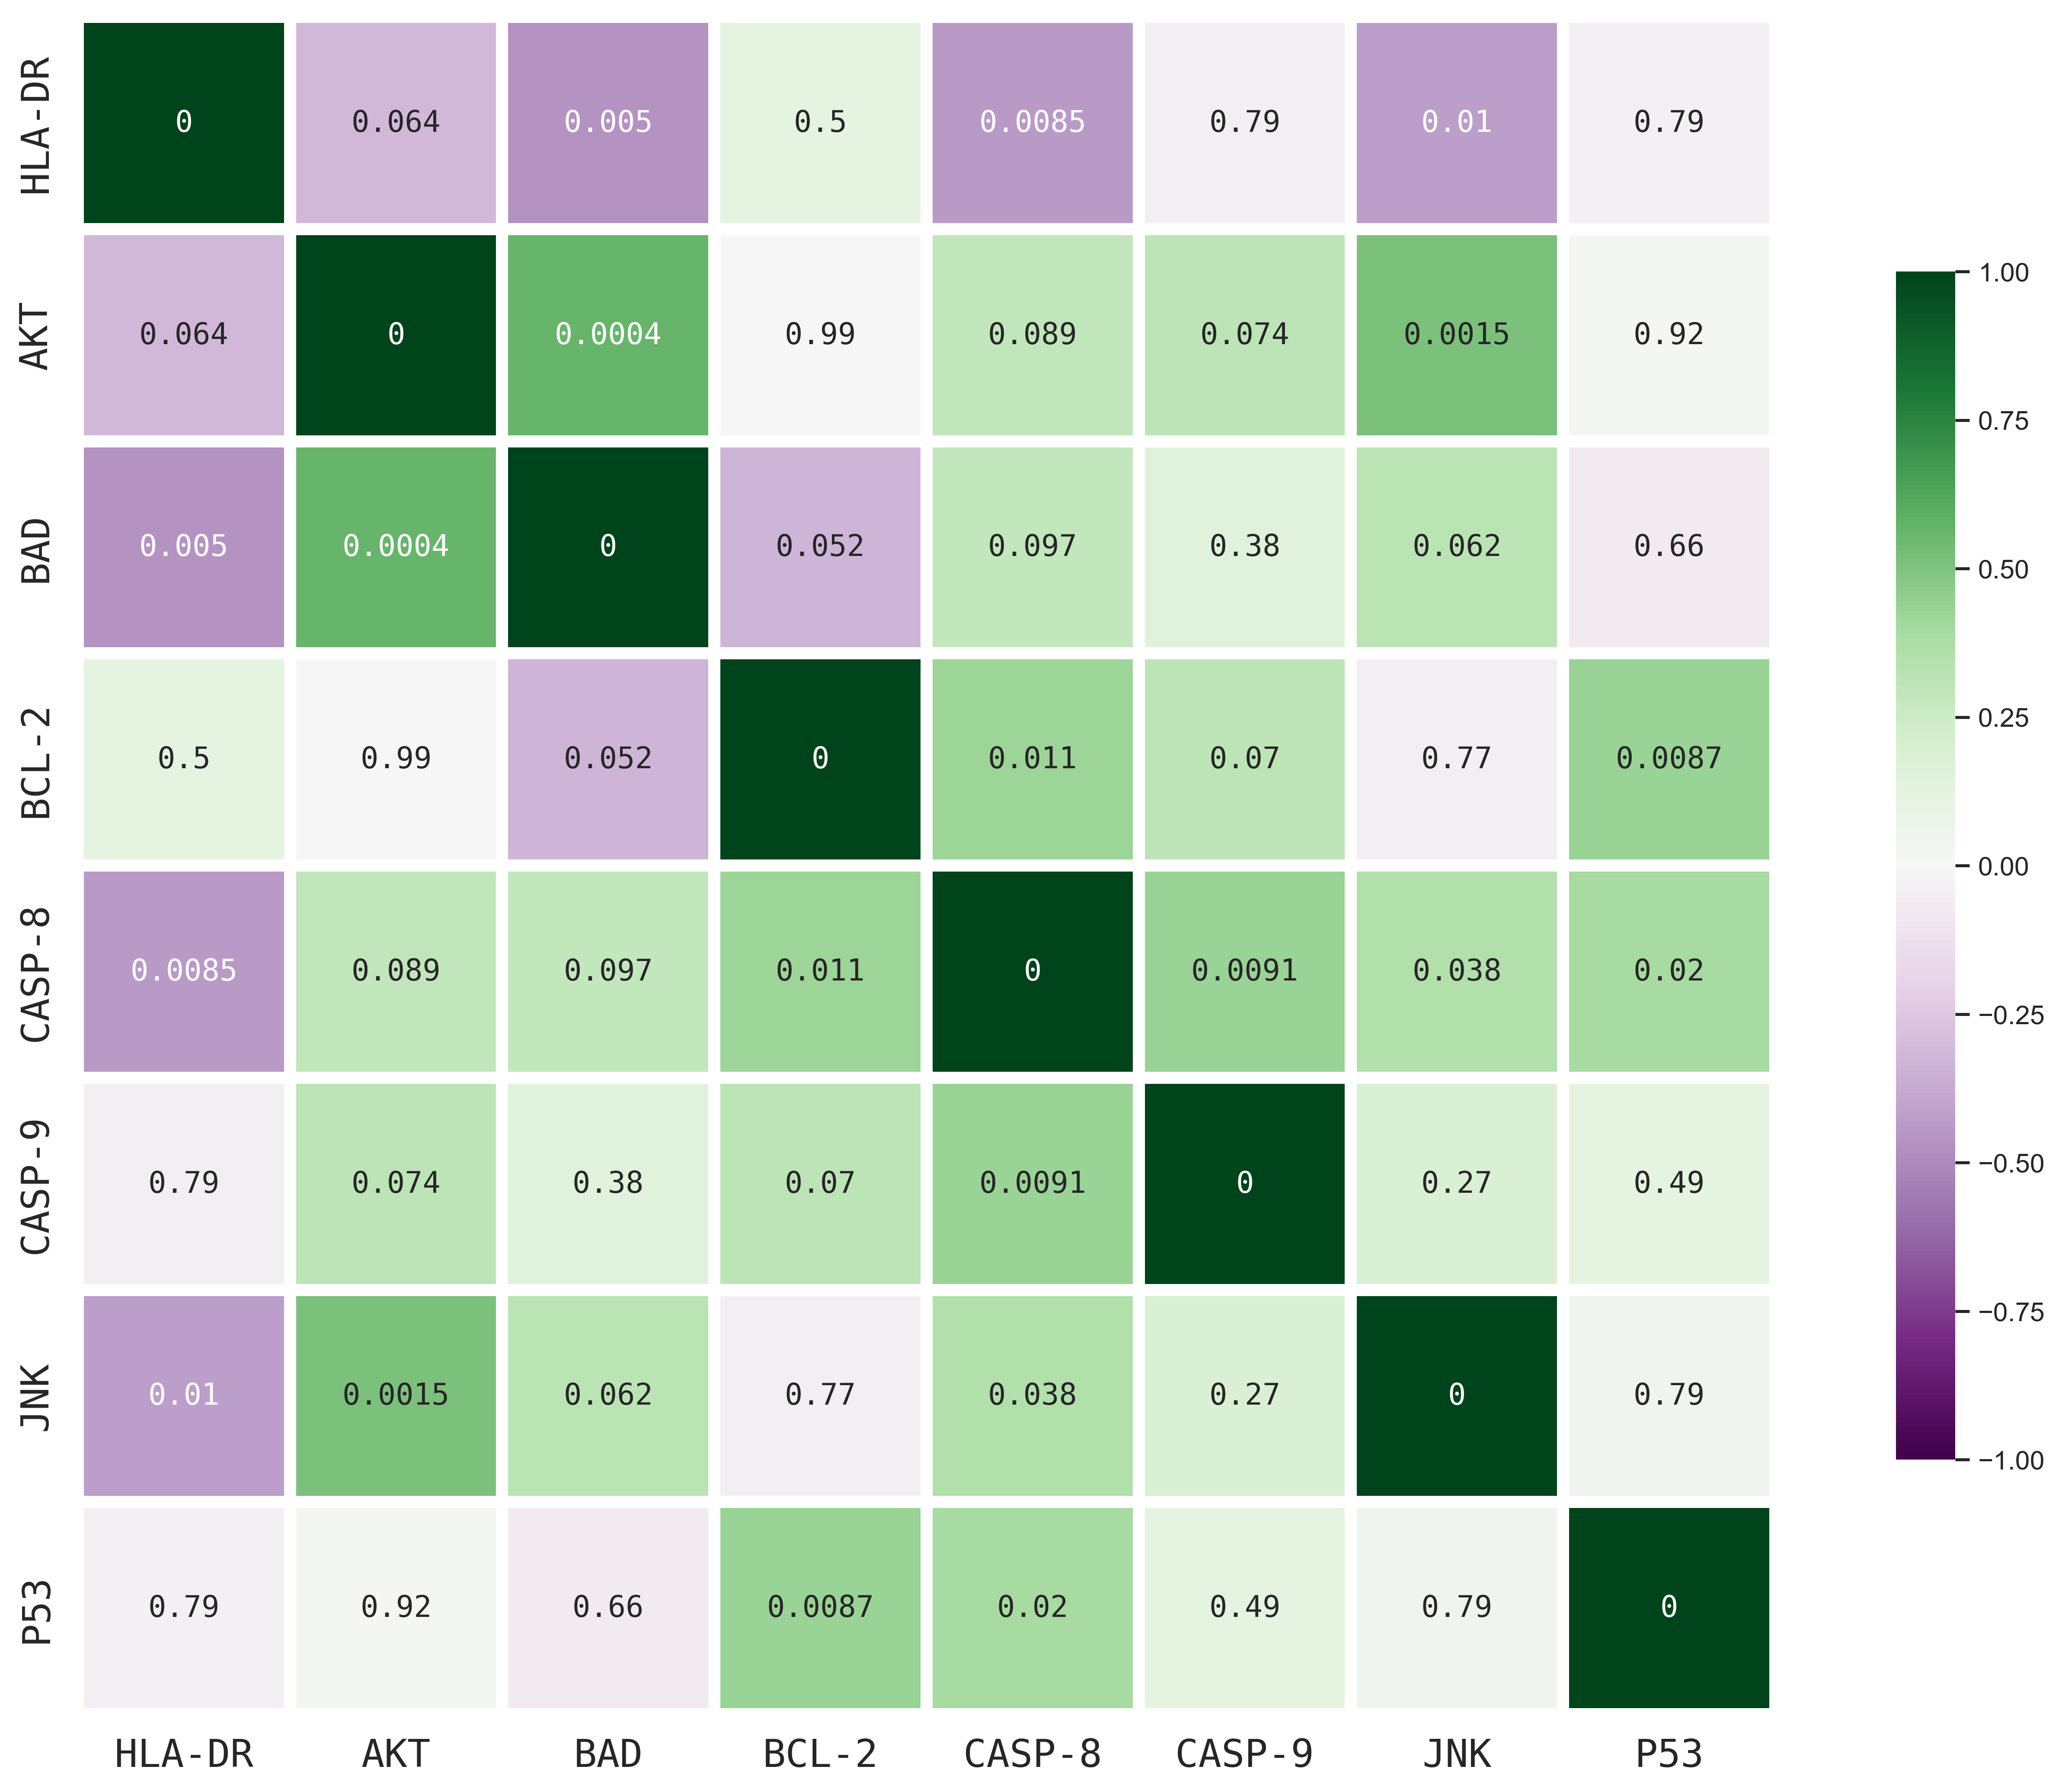

In [5]:
res = pd.read_csv('data.csv').dropna().iloc[:, [9, 10, 11, 12, 13, 14, 15, 16]].reset_index(drop=True)

res_corr = pd.DataFrame(index = res.columns, 
                        columns = res.columns)

res_p = pd.DataFrame(index = res.columns, 
                     columns = res.columns)

for i in res.columns:
    for j in res.columns:
        corr = stats.spearmanr(res[i], res[j])
        res_corr.loc[i, j] = corr[0]
        res_p.loc[i, j] = f'{corr[1]:.4f}'

res_corr, res_p = res_corr.apply(pd.to_numeric), res_p.apply(pd.to_numeric)

sns.set_theme()
f, ax = plt.subplots(1, 1, figsize=(18, 13), dpi = 400)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_font('monospace')
    tick.label.set_fontsize(16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_font('monospace')
    tick.label.set_fontsize(16)  

sns.heatmap(data = res_corr, 
            cmap = 'PRGn', 
            annot = res_p, 
            linewidths = 5,
            square = True,
            cbar_kws = {'shrink': .7},
            vmin = -1, 
            vmax = 1, 
            center = 0, 
            annot_kws={'size': 35 / np.sqrt(len(res_corr)), 'font': 'monospace'}
           )\
    .set(xticklabels = ['HLA-DR', 'AKT', 'BAD', 'BCL-2', 'CASP-8', 'CASP-9', 'JNK', 'P53'],
         yticklabels = ['HLA-DR', 'AKT', 'BAD', 'BCL-2', 'CASP-8', 'CASP-9', 'JNK', 'P53'])
plt.show()

Тема: Исследование влияния летальных случаев ковида на регуляторные молекулы апоптоза и экспрессию hla-dr в моноцитах

Гипотеза: При летальных исходах повышается экспрессия HLA-DR и молекул индуцирующих апоптоз, а также понижается экспрессия блокирующих апоптоз молекул

### Результаты

Я провел два статистических теста над выборкой: критерий Манна-Уитни, для того чтобы проверить различие исходе заболевания в зависимости от распределения того или иного фактора, а также корреляцию по Спирмену, чтобы посмотреть на взаимосвязь между парами факторов.

###### Манн-Уитни

Было сделано 3 теста: two-sided, less и greater

По результатам проведения теста оказалось, что исход заболевания зависит от распределения факторов JNK (p-value < 0.05), BAD (p-value < 0.05) и BCL-2 (p-value < 0.05). Значит нужно посмотреть на то, какие у этих факторов функции, от чего зависят, как экспрессируются. Не забываем, что все это дело происходит в моноцитах, а это макрофаги, которые еще не добрались до "поля битвы".

Понижается экспрессия HLA-Dr (p-value = 0.00254) и BCL-2 (p-value = 0.01015)

Повышается экспрессия BAD (p-value = 0.01512) и JNK (p-value = 0.00668)

###### Корреляция

По результатам проведения корреляционного анализа удалось выяснить, что имеются следующие зависимости: casp8-p53 (p-value = 0.02), casp8-jnk (p-value = 0.038), casp8-casp9 (p-value = 0.0091), bcl2-p53 (p-value = 0.0087), bcl2-casp8 (p-value = 0.011), bad-bcl2 (p-value = 0.052 (?)), akt-jnk (p-value = 0.0015), akt-bad (p-value = 0.004), hladr-jnk (p-value = 0.01), hladr-casp8 (p-value = 0.0085), hladr-bad(p-value = 0.005)